# Basic exercise 4

In [2]:
import numpy as np
from scipy.integrate import trapezoid
import matplotlib.pyplot as plt
import scipy

This is a basic exercise in the course Python For Scientists. 
The aim is to get you acquainted with the syntax of `scipy` and `numpy` and give you the necessary skills to tackle more serious problems later on.

Of course these problems can be solved very easily by using AI tools. However, since the goal is to teach you the basics, it is not recommended to use AI. Try to solve them independetly instead.

## Calculating $\pi$

It can easily be shown that
\begin{equation}
\int_0^1 \frac{4}{1+x^2} = \pi
\end{equation}

In this exercise we will evaluate this integral numerically.

### Part 1

Plot the integrandum on the interval $[0,1]$

In [ ]:
# Implement your solution here

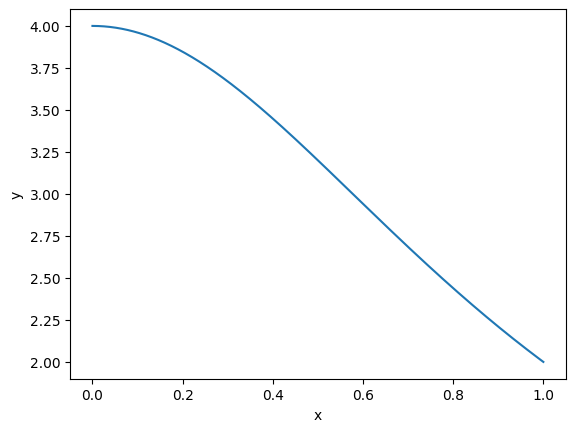

In [3]:
def integrandum(x):
    return 4 / (1 + x**2)


xx = np.linspace(0, 1, 1000)
plt.close()
plt.plot(xx, integrandum(xx))
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Part 2

Evaluate the integral numerically using the composite trapezoid rule. Implement this as a function where the number of quadrature nodes $N$ can be chosen.

In [ ]:
# Implement your solution here

In [4]:
def integ_trapezoid(N):
    xx = np.linspace(0, 1, N)
    I = trapezoid(integrandum(xx), x=xx)
    return I


print(integ_trapezoid(7))

3.1369630664712633


### Part 3
#### a)

In this part of the exercise, we will evaluate the integral with a quadrature rule that uses $N$ grid points where the function is evaluated, defined by:
\begin{equation}
x_i = 3t^2 - 2t^3
\end{equation}
with 
\begin{equation}
t = \frac{i}{N-1}
\end{equation}
with i = 0, 1, 2, ..., N-1

Implement a function that returns $N$ of these grid points on the interval $[0,1]$.

In [5]:
# Implement your solution here

In [6]:
def grid_points(N):
    points = np.zeros(N)
    for i in range(N):
        t = (i) / (N - 1)
        points[i] = 3 * t**2 - 2 * t**3
    return points

#### b)

The weights for the quadrature rule with $N$ grid points as defined above can be calculated based on the condition that the first $N$ monomials must be integrated exactly. This comes down to solving a system of linear eqations:
\begin{equation}
\underbrace{\begin{bmatrix}
1      & 1      & \cdots & 1 \\
x_1    & x_2    & \cdots & x_N \\
x_1^2  & x_2^2  & \cdots & x_N^2 \\
\vdots & \vdots & \ddots & \vdots \\
x_1^{N-1}  & x_2^{N-1}  & \cdots & x_N^{N-1}
\end{bmatrix}}_{A}
\underbrace{\begin{bmatrix}
w_1 \\ w_2 \\ \vdots \\ w_N
\end{bmatrix}}_{w}
=
\underbrace{\begin{bmatrix}
\frac{1}{1} \\
\frac{1}{2} \\
\frac{1}{3} \\
\vdots \\
\frac{1}{N}
\end{bmatrix}}_{b}.
\end{equation}

Implement a function that solves this system for arbitrary $N$.

**This system becomes easily ill-conditioned! Never make $N$ larger than 7!**

In [ ]:
# Implement your solution here

In [7]:
def NC_weights(N, nodes):
    J = np.arange(N)[:, None]
    A = nodes**J
    b = 1.0 / (np.arange(N) + 1.0)
    w = scipy.linalg.solve(A, b)
    return w

#### c)

Finally, execute the integration:
\begin{equation}
I = \sum_1^N w_i f(x_i)
\end{equation}
Implement this as a function for an arbitrary number $N$ of grid points. 

In [ ]:
# Implement your solution here

In [8]:
def integ_NC(N):
    nodes = grid_points(N)
    weights = NC_weights(N, nodes)
    I = np.sum(weights * integrandum(nodes))
    return I


print(integ_NC(7))

3.1415944705555447


### Part 4

Evaluate the integral using both techniques (trapezoid versus our custom quadrature) for $N=2,3,4,5,6,7$. Calculate the absolute difference with the exact value of $\pi$ and plot this error as function of $N$.

In [ ]:
# Implement your solution here

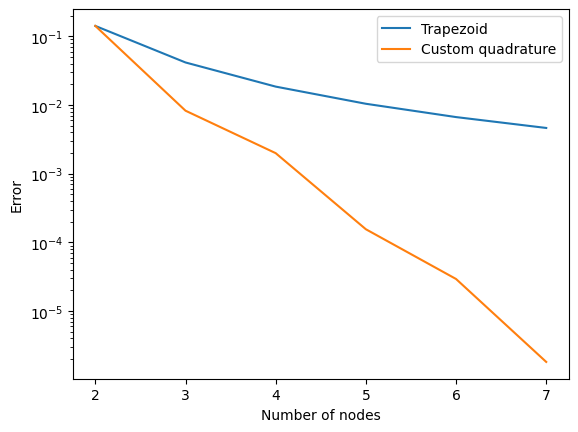

In [9]:
I1 = []
I2 = []
Ns = [2, 3, 4, 5, 6, 7]
for NN in Ns:
    I1.append(integ_trapezoid(NN))
    I2.append(integ_NC(NN))
I1 = np.array(I1)
I2 = np.array(I2)

plt.close()
plt.plot(Ns, np.abs(I1 - np.pi), label="Trapezoid")
plt.plot(Ns, np.abs(I2 - np.pi), label="Custom quadrature")
plt.yscale("log")
plt.xlabel("Number of nodes")
plt.ylabel("Error")
plt.legend()
plt.show()